In [47]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

In [119]:
import seaborn as sn; sn.set() 
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from mpl_toolkits.axes_grid1 import make_axes_locatable
from pandas import set_option

import scipy.signal as signal
from pywt import dwt,Wavelet

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVC
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.spatial.distance import pdist, squareform
from scipy.stats import mode

from keras.layers import Dense
import matplotlib.pyplot as plt
from pandas import set_option
import pandas as pd
from keras.models import Sequential
import keras.utils
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
import numpy as np 
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn 
import keras
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.models import model_from_json
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
# from keras.utils import np_utils
from keras.utils import to_categorical
from keras.models import Sequential
##from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.constraints import max_norm
from keras.layers import Dense, Flatten, Conv1D

In [3]:
# Diretório onde estão as pastas de classificação
classification_directory = '/Users/admin/Documents/EMG-LIT/EMG-S1/' # Coloque o caminho correto

# Lista para armazenar DataFrames de cada arquivo CSV
dataframes = []

# Loop pelas pastas de classificação
for classification_folder in os.listdir(classification_directory):
    classification_path = os.path.join(classification_directory, classification_folder)

    # Verifica se é uma pasta (ignora arquivos)
    if os.path.isdir(classification_path):
        # Loop pelos arquivos CSV na pasta de classificação
        for filename in os.listdir(classification_path):
            if filename.endswith('.csv'):
                file_path = os.path.join(classification_path, filename)
                df = pd.read_csv(file_path)  # Lê o arquivo CSV como DataFrame

                # Adiciona o DataFrame à lista
                dataframes.append(df)

# Concatena todos os DataFrames em um único DataFrame "dataset"
dataset1 = pd.concat(dataframes, ignore_index=True)

In [6]:
dataset1.loc[2000:]

,EMG1,EMG2,class,user
2000,-0.000124,-0.000109,0,1
2001,-0.000083,-0.000089,0,1
2002,-0.000056,-0.000084,0,1
2003,-0.000050,-0.000095,0,1
2004,-0.000065,-0.000124,0,1
...,...,...,...,...
1199995,-0.000264,-0.000007,9,1
1199996,-0.000230,-0.000007,9,1
1199997,-0.000204,-0.000006,9,1
1199998,-0.000191,-0.000007,9,1


# Armazenando em datasets

In [82]:
df_for_class = [dataset1[dataset1['class'] == i] for i in range(10)]

In [84]:
df = df_for_class[0]
df1 = df_for_class[1]
df2 = df_for_class[2]
df3 = df_for_class[3]
df4 = df_for_class[4]
df5 = df_for_class[5]
df6 = df_for_class[6]
df7 = df_for_class[7]
df8 = df_for_class[8]
df9 = df_for_class[9]

In [91]:
df2

,EMG1,EMG2,class,user,time
240000,4.632831e-04,0.000199,2,1,1
240001,2.125679e-04,0.000193,2,1,2
240002,9.106227e-07,0.000188,2,1,3
240003,-1.524032e-04,0.000185,2,1,4
240004,-2.506147e-04,0.000184,2,1,5
...,...,...,...,...,...
359995,-3.888564e-04,-0.000311,2,1,119996
359996,-3.442885e-04,-0.000312,2,1,119997
359997,-3.334301e-04,-0.000293,2,1,119998
359998,-3.541745e-04,-0.000254,2,1,119999


In [87]:
# COLOCANDO A COLUNA TIME

df['time'] = 1
df.columns = ['EMG1', 'EMG2', 'class', 'user','time']
dataframes = [df, df1, df2, df3, df4, df5, df6, df7, df8, df9]

for i, df in enumerate(dataframes, start=1):
    df['time'] = range(1, 120001)
    
# Suponha que df, df1, df2, ..., df9 são seus DataFrames individuais

C:\Users\admin\AppData\Local\Temp\ipykernel_2364\516504124.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = 1
C:\Users\admin\AppData\Local\Temp\ipykernel_2364\516504124.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = range(1, 120001)
C:\Users\admin\AppData\Local\Temp\ipykernel_2364\516504124.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [98]:
g = dataset1[dataset1['class'] == 0].index.tolist()  # Getting the indexes of each gesture 
g1 = dataset1[dataset1['class'] == 1].index.tolist()
g2 = dataset1[dataset1['class'] == 2].index.tolist()
g3 = dataset1[dataset1['class'] == 3].index.tolist()
g4 = dataset1[dataset1['class'] == 4].index.tolist()
g5 = dataset1[dataset1['class'] == 5].index.tolist()
g6 = dataset1[dataset1['class'] == 6].index.tolist()
g7 = dataset1[dataset1['class'] == 7].index.tolist()
g8 = dataset1[dataset1['class'] == 8].index.tolist()
g9 = dataset1[dataset1['class'] == 9].index.tolist()
 

In [99]:
# Suponha que dataset1 seja o nome do seu DataFrame

indices_por_classe = {}

for i in range(10):
    indices_por_classe[f'g{i}'] = dataset1[dataset1['class'] == i].index.tolist()


In [104]:
Gesto=df.drop(columns="time")
Gesto1=df1.drop(columns="time")
Gesto2=df2.drop(columns="time")
Gesto3=df3.drop(columns="time")
Gesto4=df4.drop(columns="time")
Gesto5=df5.drop(columns="time")
Gesto6=df6.drop(columns="time")
Gesto7=df7.drop(columns="time")
Gesto8=df8.drop(columns="time")
Gesto9=df9.drop(columns="time")


# Teste

In [132]:
target = dataset1.iloc[:,2]

preditoras = dataset1.copy() #Fazendo uma cópia do dataframe

del preditoras['class'] #Excluindo a variavel target, pois já separamos ela na etapa anterior

del preditoras['user']

preditoras.head()#Visualizando as variaveis preditoras

# Divisão em Dados de Treino e Teste.
X_train, X_teste, y_train, y_teste = train_test_split(preditoras, target, test_size = 0.3, random_state = 40)

X_teste, X_validacao, y_teste, y_validacao = train_test_split(X_teste, y_teste, test_size=0.5, random_state=40)

In [133]:
scaler = preprocessing.StandardScaler().fit(X_treino)
Features_train_scaler = scaler.transform(X_treino)
Features_test_scaler = scaler.transform(X_teste)
Features_valid_scaler = scaler.transform(X_validacao)

In [134]:
def metrics(Y_validation,predictions):
    print('Accuracy:', accuracy_score(Y_validation, predictions))
    print('F1 score:', f1_score(Y_validation, predictions,average='weighted'))
    print('Recall:', recall_score(Y_validation, predictions,average='weighted'))
    print('Precision:', precision_score(Y_validation, predictions, average='weighted'))
    print('\n clasification report:\n', classification_report(Y_validation, predictions))
    print('\n confusion matrix:\n',confusion_matrix(Y_validation, predictions))
    #Creating confussion matrix
    snn_cm = confusion_matrix(Y_validation, predictions)

    # Plotting cofusion matrix
    snn_df_cm = pd.DataFrame(snn_cm, range(6), range(6))  
    plt.figure(figsize = (20,14))  
    sn.set(font_scale=1.4) #for label size  
    sn.heatmap(snn_df_cm, annot=True, annot_kws={"size": 12}) # font size  
    plt.show()  

In [135]:
#Testing different values of n_neighbors
limit=10
x=[x for x in range(1,limit)]
yValidation=[0 for x in range(1,limit)]
ytrain=[0 for x in range(1,limit)]
yValidationScaler=[0 for x in range(1,limit)]
ytrainScaler=[0 for x in range(1,limit)]
yValidationPCA=[0 for x in range(1,limit)]
ytrainPCA=[0 for x in range(1,limit)]
yValidationPCAScaler=[0 for x in range(1,limit)]
ytrainPCAScaler=[0 for x in range(1,limit)]
for i in range(1,limit):
    KNN = KNeighborsClassifier(n_neighbors=i)
    
    KNN.fit(X_train, y_train)
    trainScore=KNN.score(X_train,y_train)
    validationScore=KNN.score(X_validacao, y_validacao)
    
    KNN.fit(Features_train_scaler, y_train)
    trainScoreScaler=KNN.score(Features_train_scaler,y_train)
    validationScoreScaler=KNN.score(Features_valid_scaler,y_validacao)
    
    print('n-neighbors value:',i)
    ytrain[i-1]=trainScore   
    yValidation[i-1]=validationScore
    
    ytrainScaler[i-1]=trainScoreScaler   
    yValidationScaler[i-1]=validationScoreScaler

n-neighbors value: 1
n-neighbors value: 2
n-neighbors value: 3
n-neighbors value: 4
n-neighbors value: 5
n-neighbors value: 6
n-neighbors value: 7
n-neighbors value: 8
n-neighbors value: 9


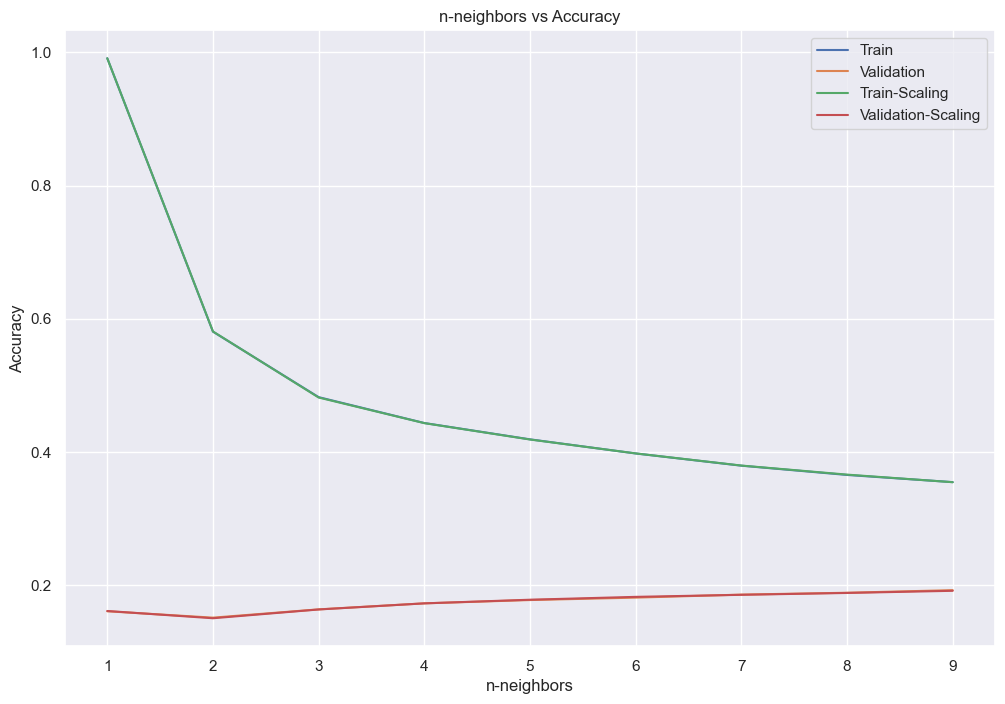

The best score with data validation:  0.19251666666666667 with Neighbors:  9
The best score with data validation with Scaling:  0.19154444444444443 with Neighbors:  9


In [136]:
plt.figure(figsize=(12, 8), dpi=100, facecolor='w', edgecolor='k')
plt.plot(x,ytrain,label='Train')
plt.plot(x,yValidation,label='Validation')
plt.plot(x,ytrainScaler,label='Train-Scaling')
plt.plot(x,yValidationScaler,label='Validation-Scaling')

plt.xlabel('n-neighbors')
plt.ylabel('Accuracy')
plt.title('n-neighbors vs Accuracy')
plt.legend()
plt.xticks(range(1,10))
plt.savefig('KNN-Algorithm.pdf', dpi=300)
plt.show()  
print('The best score with data validation: ', max(yValidation),'with Neighbors: ',x[yValidation.index(max(yValidation))])
print('The best score with data validation with Scaling: ', max(yValidationScaler),'with Neighbors: ',x[yValidationScaler.index(max(yValidationScaler))])

# Plotando gráficos

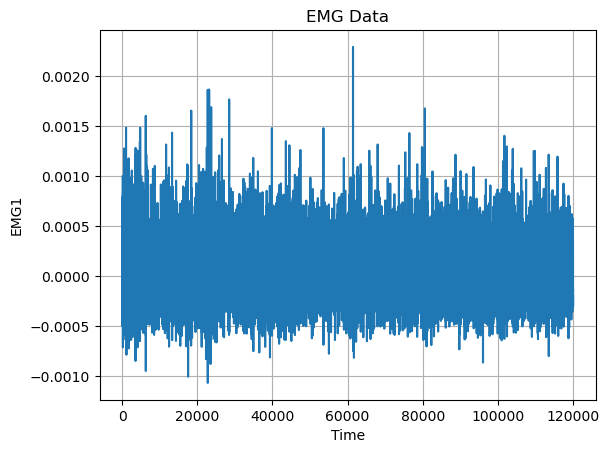

In [48]:
# Plotando gráfico
time = df['time']
emg1 = df['EMG1']

plt.plot(time, emg1)
plt.xlabel('Time')
plt.ylabel('EMG1')
plt.title('EMG Data')
plt.grid(True)
plt.show()



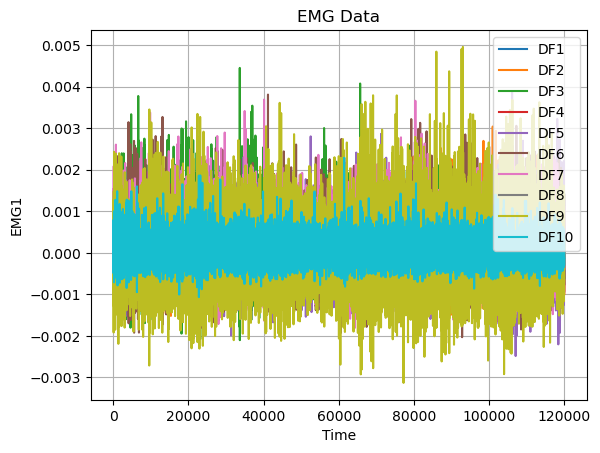

In [49]:
dataframes = [df, df1, df2, df3, df4, df5, df6, df7, df8, df9]

for i, df_atual in enumerate(dataframes, start=1):
    time = df_atual['time']
    emg1 = df_atual['EMG1']
    
    plt.plot(time, emg1, label=f'DF{i}')

plt.xlabel('Time')
plt.ylabel('EMG1')
plt.title('EMG Data')
plt.grid(True)
plt.legend()
plt.show()

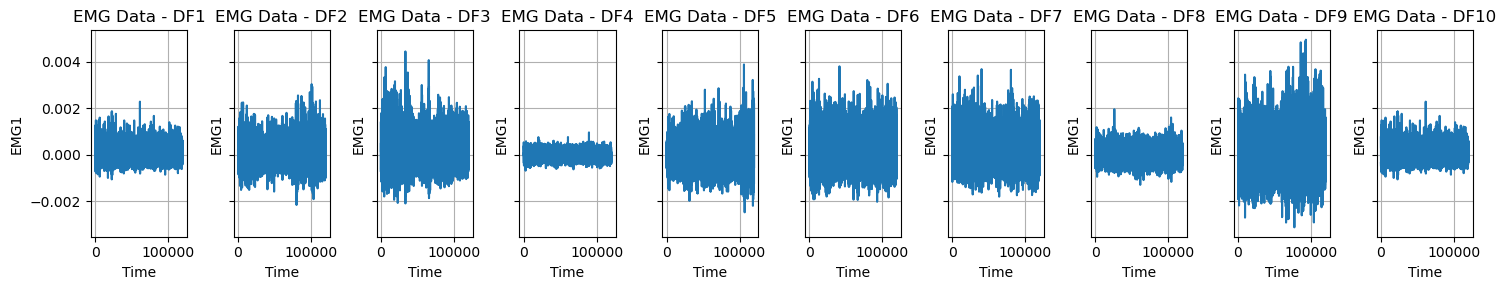

In [50]:
import matplotlib.pyplot as plt

# Suponha que df, df1, df2, ..., df9 são seus DataFrames individuais

dataframes = [df, df1, df2, df3, df4, df5, df6, df7, df8, df9]

# Cria uma grade de subplots (1 linha, 10 colunas)
fig, axs = plt.subplots(1, len(dataframes), figsize=(15, 3), sharey=True)

for i, (df_atual, ax) in enumerate(zip(dataframes, axs), start=1):
    time = df_atual['time']
    emg1 = df_atual['EMG1']
    
    ax.plot(time, emg1)
    ax.set_xlabel('Time')
    ax.set_ylabel('EMG1')
    ax.set_title(f'EMG Data - DF{i}')
    ax.grid(True)

plt.tight_layout()
plt.show()
